## <center> Projet Nº 8 </center>

### Description :

**L’objectif de ce projet est de sélectionner un groupe de pays dans le but de déterminer lesquels auront un niveau d’exportation élevé en tonne, une production importante de fruits tropicaux et le meilleur prix à la production afin que la société puisse importer les matières premières dont elle a besoin pour fabriquer des jus de fruit.**

In [ ]:
# dashbord tableau
# //public.tableau.com/app/profile/rorro3198/viz/dashbord-fruit-tropicaux/Tableaudebord1?publish=yes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from visualization import *
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 4000)
pd.set_option('display.max_rows', 4000000000)

## Importations des données

In [2]:
df_export = pd.read_csv('./data2/exportation.csv')
df_prix_prod = pd.read_csv('./data2/prix_production.csv')
df_prod = pd.read_csv("./data2/production.csv")

## Partie 1 : Nettoyage de Données

In [3]:
# Recherche d'éventuelles valeurs en doublons avec la function duplicated
print("Valeurs en doublon sur les données extraites du fichier exportation : " + str(df_export.duplicated().sum()))
print("Valeurs en doublon sur les données extraites du fichier prix à la production : " + str(df_prix_prod.duplicated().sum()))
print("Valeurs en doublon sur les données extraites du fichier production : " + str(df_prod.duplicated().sum()))

Valeurs en doublon sur les données extraites du fichier exportation : 0
Valeurs en doublon sur les données extraites du fichier prix à la production : 0
Valeurs en doublon sur les données extraites du fichier production : 0


In [4]:
# Recherce d'éventuelles valeurs manquantes avec la function isna()
print("Valeurs en doublon sur les données extraites du fichier exportation : " + str(df_export.isna().any().sum()))
print("Valeurs en doublon sur les données extraites du fichier prix à la production : " + str(df_prix_prod.isna().any().sum()))
print("Valeurs en doublon sur les données extraites du fichier production : " + str(df_prod.isna().any().sum()))

Valeurs en doublon sur les données extraites du fichier exportation : 2
Valeurs en doublon sur les données extraites du fichier prix à la production : 1
Valeurs en doublon sur les données extraites du fichier production : 2


In [5]:
df_export.isna().mean()

Code Domaine              0.000000
Domaine                   0.000000
Code zone (FAO)           0.000000
Zone                      0.000000
Code Élément              0.000000
Élément                   0.000000
Code Produit (FAO)        0.000000
Produit                   0.000000
Code année                0.000000
Année                     0.000000
Unité                     0.000000
Valeur                    0.035546
Symbole                   0.796518
Description du Symbole    0.000000
dtype: float64

In [6]:
# Affichage des colonnes
print(df_export.columns)
print(df_prix_prod.columns)
print(df_prod.columns)

Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (FAO)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année',
       'Code Mois', 'Mois', 'Unité', 'Valeur', 'Symbole',
       'Description du Symbole'],
      dtype='object')
Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit (FAO)', 'Produit', 'Code année', 'Année',
       'Unité', 'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')


In [7]:
# Recherche d'éventuelles valeurs en doublons pour la Chine
df_export[df_export.Zone.str.contains("Chine")]
# On élimine les doublons de la chine
df_export = df_export.loc[(df_export['Code zone (FAO)'] != 351) & (df_export['Code zone (FAO)'] != 96) & (df_export['Code zone (FAO)'] != 128) & (df_export['Code zone (FAO)'] != 214)]
df_prod = df_prod.loc[(df_prod['Code zone (FAO)'] != 351) & (df_prod['Code zone (FAO)'] != 214)]

In [8]:
# Application d'une fuction drop() pour supprimer les variables inutiles à l'analyse
df_export.drop(['Code Domaine', 'Domaine', 'Code année', 'Symbole', 'Description du Symbole', 'Unité'], axis=1, inplace=True)
df_prix_prod.drop(['Code Domaine', 'Domaine', 'Code année', 'Symbole', 'Description du Symbole', 'Unité'], axis=1, inplace=True)
df_prod.drop(['Code Domaine', 'Domaine', 'Code année', 'Symbole', 'Description du Symbole', 'Unité'], axis=1, inplace=True)

In [9]:
############################### nettoyage du dataframe df_export ################################################
# On separe les dataframe par année
df_export_2017 = df_export[df_export['Année'] == 2017]
df_export_2018 = df_export[df_export['Année'] == 2018]
df_export_2019 = df_export[df_export['Année'] == 2019]
# On utilise .pivot_table()
df_export_2017 = df_export_2017.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_export_2017.rename(columns={'Exportations - Quantité': 'export_2017'}, inplace=True)
# .pivot_table 2018
df_export_2018 = df_export_2018.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_export_2018.rename(columns={'Exportations - Quantité': 'export_2018'}, inplace=True)
# .pivot_table 2019
df_export_2019 = df_export_2019.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_export_2019.rename(columns={'Exportations - Quantité': 'export_2019'}, inplace=True)
# On utilice merge
df_export_1 = pd.merge(df_export_2017, df_export_2018, on=['Zone', 'Produit'], how='left')
df_export_2 = pd.merge(df_export_1, df_export_2019, on=['Zone', 'Produit'], how='left')
# Creation d'un neaveau dataframe issu d'une aggregation pays
df = df_export_2.groupby('Zone').sum().reset_index()

############################### nettoyage du dataframe df_prix_prod ################################################
# On separe les dataframe par année
df_prix_prod_2017 = df_prix_prod[df_prix_prod['Année'] == 2017]
df_prix_prod_2018 = df_prix_prod[df_prix_prod['Année'] == 2018]
df_prix_prod_2019 = df_prix_prod[df_prix_prod['Année'] == 2019]
# On utilise .pivot_table()
# 2017
df_prix_prod_2017 = df_prix_prod_2017.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prix_prod_2017.rename(columns={'Prix à la Production (USD/tonne)': 'prix_prod_2017'}, inplace=True)
# pivot_table 2018
df_prix_prod_2018 = df_prix_prod_2018.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prix_prod_2018.rename(columns={'Prix à la Production (USD/tonne)': 'prix_prod_2018'}, inplace=True)
# pivot_table 2019
df_prix_prod_2019 = df_prix_prod_2019.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prix_prod_2019.rename(columns={'Prix à la Production (USD/tonne)': 'prix_prod_2019'}, inplace=True)
# On utilice merge
df_prix_prod_1 = pd.merge(df_prix_prod_2017, df_prix_prod_2018, on=['Zone', 'Produit'], how='left')
df_prix_prod_2 = pd.merge(df_prix_prod_1, df_prix_prod_2019, on=['Zone', 'Produit'], how='left')
# Creation d'un neaveau dataframe issu d'une aggregation pays
df_2 = df_prix_prod_2.groupby('Zone').sum().reset_index()

############################### nettoyage du dataframe df_prod ################################################
# On separe les dataframe par année
df_prod_2017 = df_prod[df_prod['Année'] == 2017]
df_prod_2018 = df_prod[df_prod['Année'] == 2018]
df_prod_2019 = df_prod[df_prod['Année'] == 2019]
# On utilise .pivot_table()
# 2017
df_prod_2017 = df_prod_2017.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prod_2017.rename(columns={'Production': 'prod_2017'}, inplace=True)
# pivot_table 2018
df_prod_2018 = df_prod_2018.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prod_2018.rename(columns={'Production': 'prod_2018'}, inplace=True)
# pivot_table 2019
df_prod_2019 = df_prod_2019.pivot_table(index=['Zone', 'Produit'], columns=[ 'Élément'], values='Valeur',
                                 aggfunc=sum).reset_index()
df_prod_2019.rename(columns={'Production': 'prod_2019'}, inplace=True)
# On utilice merge
df_prod_1 = pd.merge(df_prod_2017, df_prod_2018, on=['Zone', 'Produit'], how='left')
df_prod_2 = pd.merge(df_prod_1, df_prod_2019, on=['Zone', 'Produit'], how='left')
# Creation d'un neaveau dataframe issu d'une aggregation pays
df_3 = df_prod_2.groupby('Zone').sum().reset_index()

## On utilise mrge

data = pd.merge(df, df_2, on='Zone', how='left')
df_final = pd.merge(data, df_3, on='Zone', how='left')
# On utilise la fuction dropna()
df_final.dropna(subset=['prix_prod_2017', 'prix_prod_2018', 'prix_prod_2019', 'prod_2017',
                       'prod_2018', 'prod_2019'], inplace=True)
df_final.head() # 88 pays

Élément,Zone,export_2017,export_2018,export_2019,prix_prod_2017,prix_prod_2018,prix_prod_2019,prod_2017,prod_2018,prod_2019
1,Afrique du Sud,19389.0,21451.0,23907.0,4580.0,3537.0,3501.0,645957.0,760065.0,737083.0
2,Albanie,36953.0,19241.0,16632.0,1535.0,1613.0,1769.0,315748.0,305745.0,322434.0
3,Algérie,287.0,430.0,326.0,847.0,866.0,964.0,2020200.0,2205192.0,2321201.0
7,Arabie saoudite,29313.0,17737.0,10267.0,1600.0,1694.0,2578.0,651237.0,535562.0,732665.0
8,Argentine,896.0,1256.0,800.0,1966.0,0.0,0.0,392886.0,392571.0,392884.0


**Observation :**
- Pour cette étude le dataset a été crée grâce à la base de données de la FAO.
- Les variables choisies portent sur **l'Exportation, la Production, le prix à la production**. Ces données portent sur l'année **(2017, 2018, 2019).**
- On va savoir quel pays a les matiers premier moins cher pour l'elavoration des produit (concentrèe du jus fruit)

## Partie 2 : Analyses exploratoires des données

*Une fois le nettoyage des données effectué, on va pouvoir passer à l'étape des analyses exploratoires des données. Grâce à cette étape, on va pouvoir se familiariser avec nos données, découvrir l'état des lieux du financement de l'éducation primaire à travers les pays de notre échantillon.* 

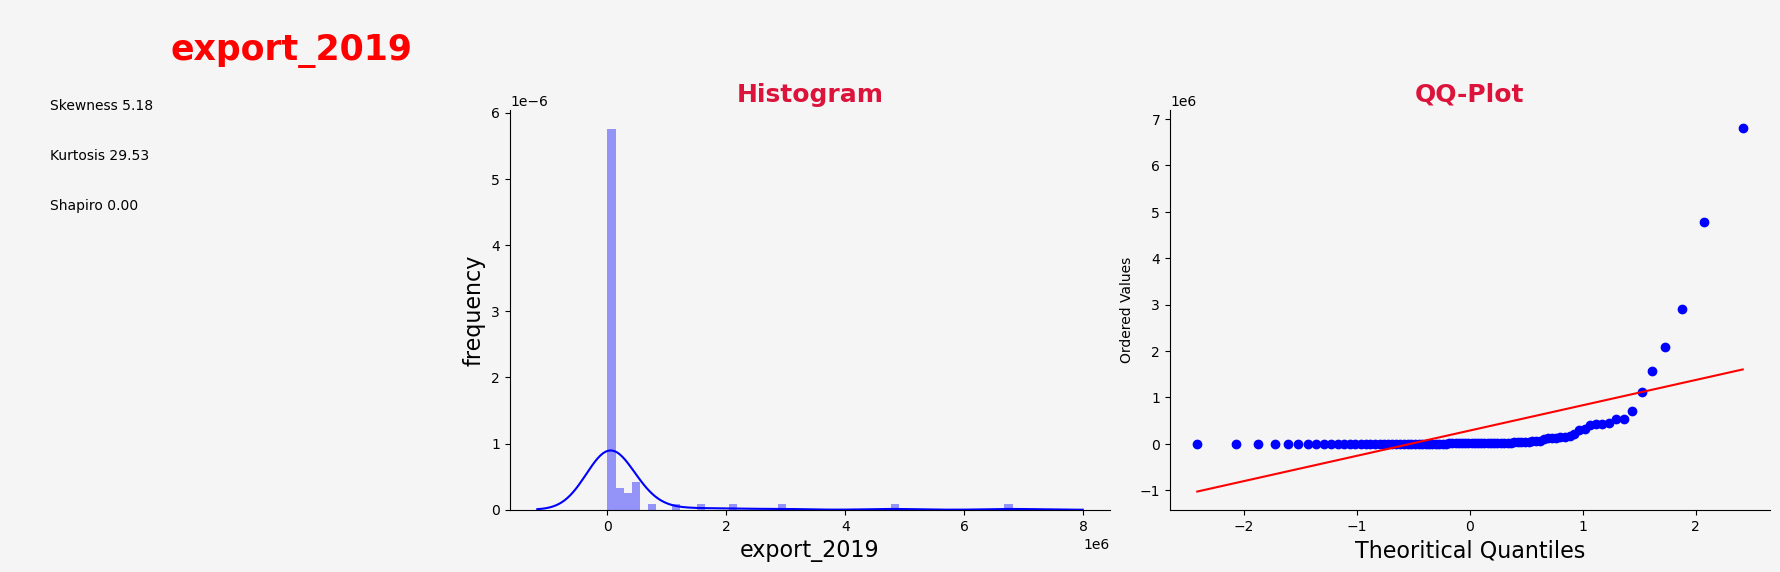

In [10]:
conclusion_text = 'export_2019 has  \nSkewness and  Kurtosis'
check_normality(df_final, 'export_2019', 'export_2019', conclusion_text)

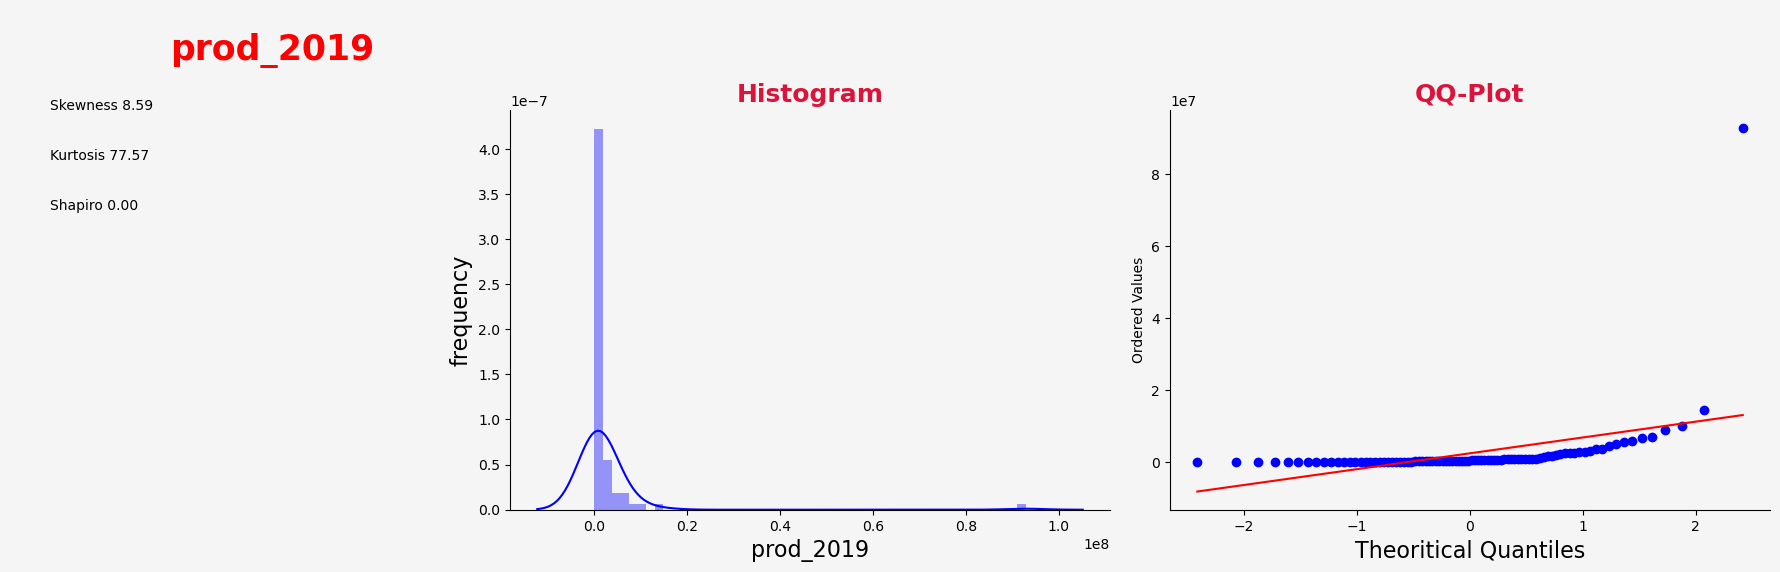

In [11]:
conclusion_text = 'prod_2019 has  \nSkewness and  Kurtosis'
check_normality(df_final, 'prod_2019', 'prod_2019', conclusion_text)

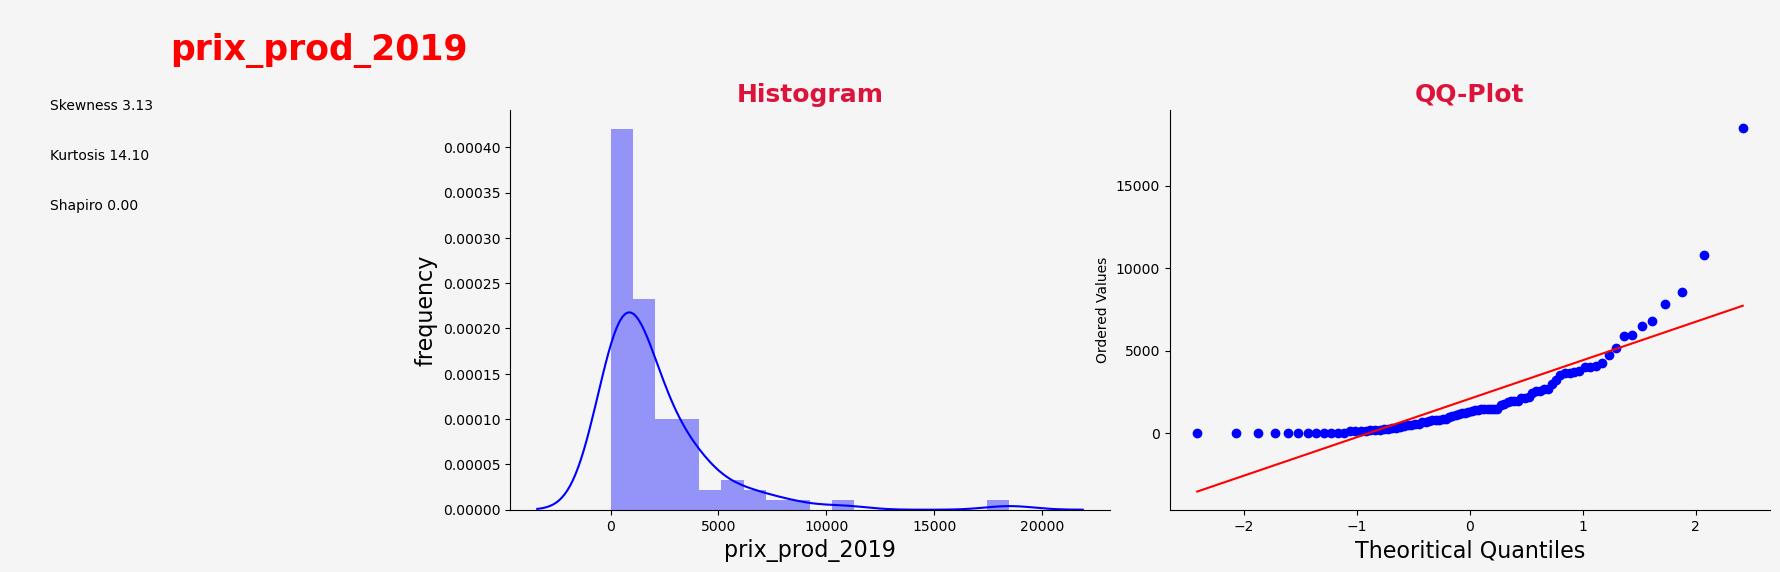

In [12]:
conclusion_text = 'prix_prod_2019 has  \nSkewness and  Kurtosis'
check_normality(df_final, 'prix_prod_2019', 'prix_prod_2019', conclusion_text)

**Observation :**
- L'analyse de la distribution nous indique qu'aucune de nos variables ne suit la loi normale.
- On réalise les **Test Shapiro pour vérifier si les variables suivent la loi normale, avec une P-value inférieur à 5%, nos variables ne suivent pas la loi normale**

In [13]:
# Calcul des médianes pour chaque variable
df_final.median().T

Élément
export_2017        11753.5
export_2018        12525.0
export_2019        10929.0
prix_prod_2017      1567.5
prix_prod_2018      1328.0
prix_prod_2019      1298.0
prod_2017         316770.0
prod_2018         327994.0
prod_2019         355573.5
dtype: float64

In [14]:
# Calcul des moyen pour chaque variable
df_final.mean().T

Élément
export_2017       2.818343e+05
export_2018       2.866474e+05
export_2019       2.868554e+05
prix_prod_2017    2.420125e+03
prix_prod_2018    2.305580e+03
prix_prod_2019    2.096818e+03
prod_2017         2.342257e+06
prod_2018         2.358796e+06
prod_2019         2.372310e+06
dtype: float64

## Partie 3 : Clustering via la méthode du K-Means

> ***Détermination du nombre de clusters***

In [16]:
df_final.set_index('Zone', inplace=True)
#X = df_final.iloc[:, 0].values
X = df_final.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

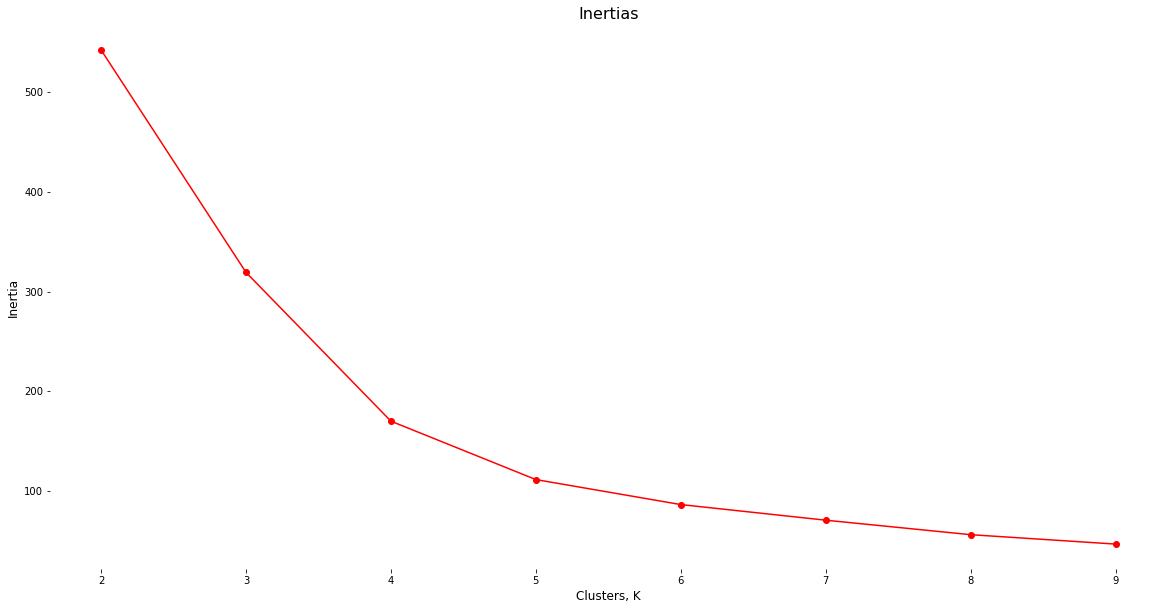

In [27]:
plt.figure(figsize=(20,10))
ks = range(2, 10)
inertias = []

#plt.subplot(122)
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='red')
plt.title("Inertias", fontsize=16)
plt.xlabel("Clusters, K", fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(ks)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('clust_km.png')
plt.show()

In [18]:
# Calcule Silhouette score
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
print(silhouette_score(X_scaled, kmeans.labels_, metric = 'euclidean'))

0.5223020025454962


**Observation :**
- Le nombre de cluster optimal est estimé à k=5, la silhouette est égale à 0.52%.

In [19]:
# k means avec 5 clusters et k-means++ initialization
cls = cluster.KMeans(n_clusters=5, init='k-means++')
cls.fit(X_scaled)
# index trié des clusters
idk = np.argsort(cls.labels_)

# Affichage des observation selon leurs clusters
df_cls = pd.DataFrame(df_final.index[idk], cls.labels_[idk]).reset_index()
df_cls = df_cls.rename(columns={"index": 'Cluster'})
# Integration des clusters dans le dataframe
df_cls = pd.merge(df_final,df_cls, on='Zone')
df_cls.head()

,Zone,export_2017,export_2018,export_2019,prix_prod_2017,prix_prod_2018,prix_prod_2019,prod_2017,prod_2018,prod_2019,Cluster
0,Afrique du Sud,19389.0,21451.0,23907.0,4580.0,3537.0,3501.0,645957.0,760065.0,737083.0,2
1,Albanie,36953.0,19241.0,16632.0,1535.0,1613.0,1769.0,315748.0,305745.0,322434.0,1
2,Algérie,287.0,430.0,326.0,847.0,866.0,964.0,2020200.0,2205192.0,2321201.0,1
3,Arabie saoudite,29313.0,17737.0,10267.0,1600.0,1694.0,2578.0,651237.0,535562.0,732665.0,1
4,Argentine,896.0,1256.0,800.0,1966.0,0.0,0.0,392886.0,392571.0,392884.0,1


In [20]:
# Taille des clusters
print(str(len(df_cls[df_cls['Cluster'] == 0]['Zone'])) + " pays dans le cluster 0")
print(str(len(df_cls[df_cls['Cluster'] == 1]['Zone'])) + " pays dans le cluster 1")
print(str(len(df_cls[df_cls['Cluster'] == 2]['Zone'])) + " pays dans le cluster 2")
print(str(len(df_cls[df_cls['Cluster'] == 3]['Zone'])) + " pays dans le cluster 3")
print(str(len(df_cls[df_cls['Cluster'] == 4]['Zone'])) + " pays dans le cluster 4")

3 pays dans le cluster 0
62 pays dans le cluster 1
19 pays dans le cluster 2
1 pays dans le cluster 3
3 pays dans le cluster 4


## Analyse des groupes obtenus par K-Means

**Nous allons vérifier la significativité de nos données en comparant les variances et les moyennes de 3 clusters.**

***L'hypothèse nulle $H_0$. correspond à des variances égales. Sous l’alternative alternative $H_1$, les variances des deux clusters sont différentes. Le risque n’étant pas précisé, on prendra α = 5%.***

> **Analyse de cluster par variables**
>> ***Exportation en tonne année 2017 à 2019***

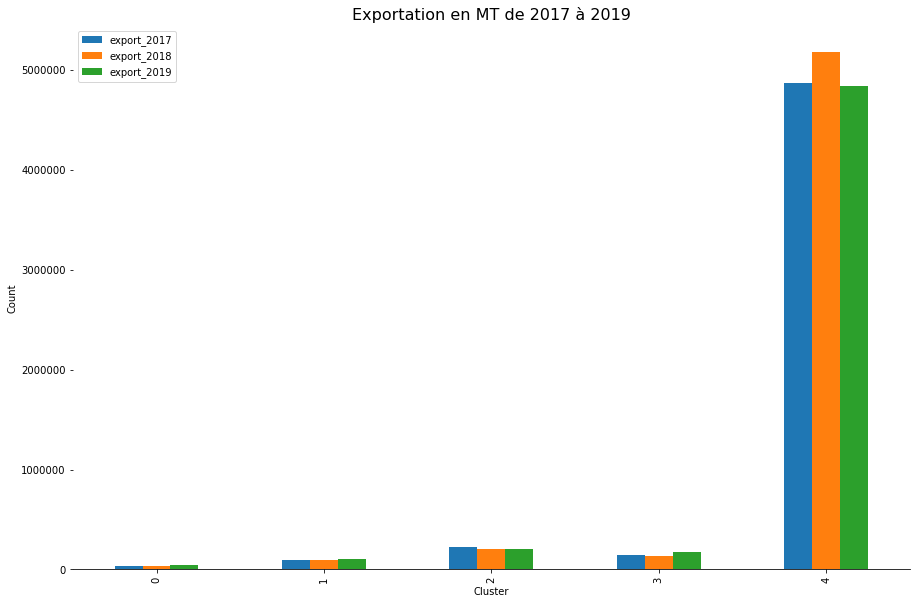

In [40]:
plt.rcParams["figure.figsize"] = (15,10)
export = df_cls.groupby('Cluster')[['export_2017', 'export_2018', 'export_2019']].mean().reset_index()

export.plot(kind='bar', x='Cluster')
plt.title('Exportation en MT de 2017 à 2019', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Observation :**

- On observe que pour la periode de 2017 à 2019, le cluster qui a la moyenne plus important pour les exportation est le cluster 4.
 

> > ***Prix à la production de 2017 à 2019***

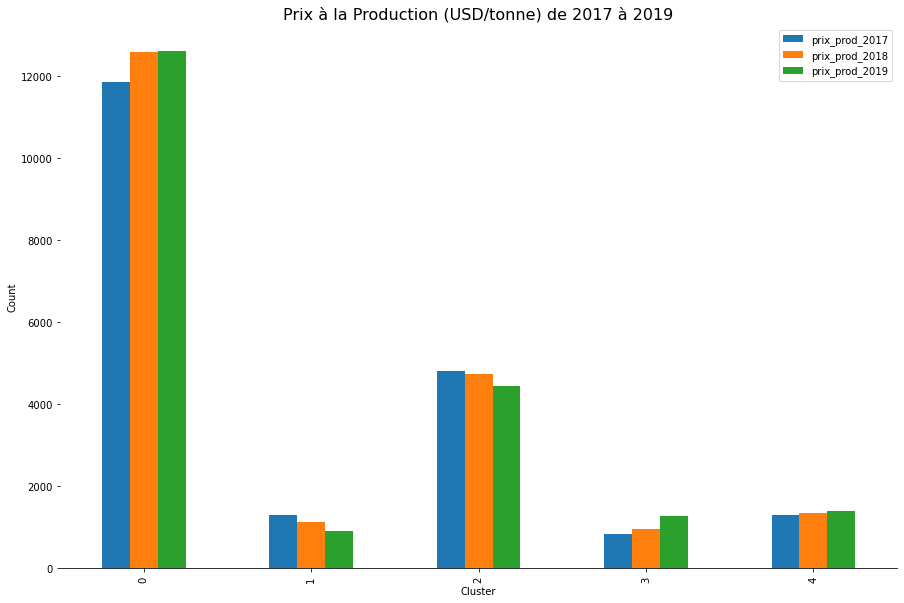

In [34]:
plt.rcParams["figure.figsize"] = (15,10)
prix_a_prod = df_cls.groupby('Cluster')[['prix_prod_2017', 'prix_prod_2018', 'prix_prod_2019']].mean().reset_index()

prix_a_prod.plot(kind='bar', x='Cluster')
plt.title('Prix à la Production (USD/tonne) de 2017 à 2019', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Observation :**

- On observe que pour la periode de 2017 à 2019, le cluster qui a la moyenne moins élvé pour le prix à la prduction (USD/tonne) est le cluster 4.

> > ***Production en tonne 2017 à 2019***

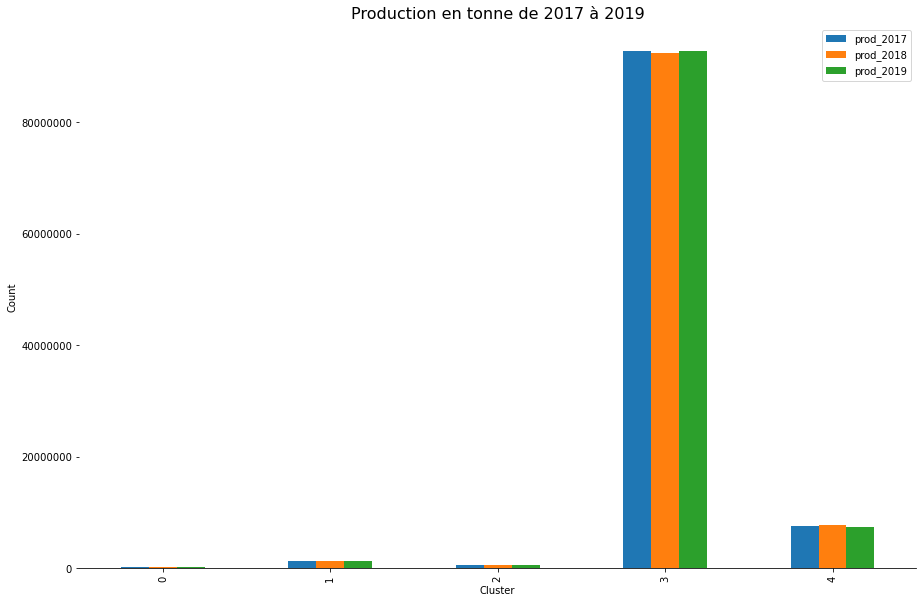

In [39]:
plt.rcParams["figure.figsize"] = (15,10)
prod_tonne = df_cls.groupby('Cluster')[['prod_2017', 'prod_2018', 'prod_2019']].mean().reset_index()

prod_tonne.plot(kind='bar', x='Cluster')
plt.title('Production en tonne de 2017 à 2019', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Observation :**

- On observe que pour la periode de 2017 à 2019, le cluster qui a la moyenne plus important pour la production est le cluster 3. cependant, il faut preciser que ce cluster ne contient qu'un seul pays, suivi par le cluster 4.

In [45]:
# Compte tenu de leurs niveau d'exportation et de la production ansi qu'un prix à la production moins élevé
# On va selectionner les cluster 4

pays_a_imp = df_cls.loc[df_cls['Cluster'] == 4]

pays_a_imp2 = pays_a_imp[pays_a_imp.prix_prod_2019 > 0]
pays = pays_a_imp2.sort_values(by='prix_prod_2019', ascending=True)
#pays.head()

## Conclusion :

**A l’issue de cette étude, nous sommes en mesure de conseiller à la société qui souhaite se lancer dans la production de jus de fruits de la manière suivante :**

***Le cluster quatre est celui le plus intéressant compte tenu de sa production importante des matières premières, avec des exportations élevées et un prix à la production (USD/tonne) raisonnable, tels que :***

- Les Philippines ;

- Le Costa Rica ;

- L’Equateur.

**Les pays de ce cluster semblent être le meilleur choix car ils permettront à notre société d’importer sans difficulté les matières premières nécessaires à la fabrication des jus de fruits, et cela avec un coût raisonnable.**